In [41]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Attribute Information:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed

-- 2 building_windows_non_float_processed

-- 3 vehicle_windows_float_processed

-- 4 vehicle_windows_non_float_processed (none in this database)

-- 5 containers

-- 6 tableware

-- 7 headlamps


In [42]:
data = pd.read_csv('/content/glass_data.txt')
data.columns = ['Id','RI','NA','MG','AL','SI','K','CA','BA','FE','TYPE OF GLASS']

In [43]:
datA = pd.DataFrame(data)


In [44]:
data.head()

,Id,RI,NA,MG,AL,SI,K,CA,BA,FE,TYPE OF GLASS
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [45]:
data.isnull().sum()

Id               0
RI               0
NA               0
MG               0
AL               0
SI               0
K                0
CA               0
BA               0
FE               0
TYPE OF GLASS    0
dtype: int64

In [46]:
data.drop_duplicates()
data.shape

(213, 11)

In [47]:
data.dtypes

Id                 int64
RI               float64
NA               float64
MG               float64
AL               float64
SI               float64
K                float64
CA               float64
BA               float64
FE               float64
TYPE OF GLASS      int64
dtype: object

In [48]:
del data['Id']

In [49]:
data

,RI,NA,MG,AL,SI,K,CA,BA,FE,TYPE OF GLASS
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [50]:
data.describe()

,RI,NA,MG,AL,SI,K,CA,BA,FE,TYPE OF GLASS
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [51]:
iqr = data.RI.quantile(0.75) - data.RI.quantile(0.25)
upper_threshold = data.RI.quantile(0.75) + (iqr*1.5)
lower_threshold =data.RI.quantile(0.25)  - (iqr*1.5)
lower_threshold , upper_threshold

(1.5125750000000002, 1.5230949999999999)

In [52]:
iqr = data.NA.quantile(0.75) - data.NA.quantile(0.25)
upper_threshold = data.NA.quantile(0.75) + (iqr*1.5)
lower_threshold =data.NA.quantile(0.25)  - (iqr*1.5)
lower_threshold , upper_threshold

(11.505, 15.225)

In [53]:
iqr = data.MG.quantile(0.75) - data.MG.quantile(0.25)
upper_threshold = data.MG.quantile(0.75) + (iqr*1.5)
lower_threshold =data.MG.quantile(0.25)  - (iqr*1.5)
lower_threshold , upper_threshold

(-0.1750000000000007, 5.865)

In [54]:
data['MG'] = data['MG'].clip(-0.175,5.865)

In [55]:
iqr = data.AL.quantile(0.75) - data.AL.quantile(0.25)
upper_threshold = data.AL.quantile(0.75) + (iqr*1.5)
lower_threshold =data.AL.quantile(0.25)  - (iqr*1.5)
lower_threshold , upper_threshold

(0.53, 2.29)

In [56]:
iqr = data.SI.quantile(0.75) - data.SI.quantile(0.25)
upper_threshold = data.SI.quantile(0.75) + (iqr*1.5)
lower_threshold =data.SI.quantile(0.25)  - (iqr*1.5)
lower_threshold , upper_threshold

(71.065, 74.305)

In [57]:
iqr = data.K.quantile(0.75) - data.K.quantile(0.25)
upper_threshold = data.K.quantile(0.75) + (iqr*1.5)
lower_threshold =data.K.quantile(0.25)  - (iqr*1.5)
lower_threshold , upper_threshold

(-0.59, 1.33)

In [58]:
iqr = data.CA.quantile(0.75) - data.CA.quantile(0.25)
upper_threshold = data.CA.quantile(0.75) + (iqr*1.5)
lower_threshold =data.CA.quantile(0.25)  - (iqr*1.5)
lower_threshold , upper_threshold

(6.830000000000001, 10.59)

In [59]:
iqr = data.BA.quantile(0.75) - data.BA.quantile(0.25)
upper_threshold = data.BA.quantile(0.75) + (iqr*1.5)
lower_threshold =data.BA.quantile(0.25)  - (iqr*1.5)
lower_threshold , upper_threshold

(0.0, 0.0)

In [60]:
iqr = data.FE.quantile(0.75) - data.FE.quantile(0.25)
upper_threshold = data.FE.quantile(0.75) + (iqr*1.5)
lower_threshold =data.FE.quantile(0.25)  - (iqr*1.5)
lower_threshold , upper_threshold

(-0.15000000000000002, 0.25)

# **Exploratory Data Analysis (EDA)**

<AxesSubplot:>

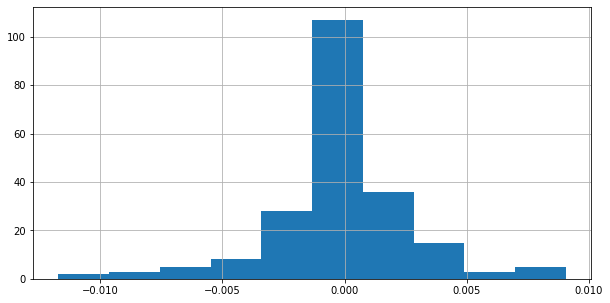

In [61]:
plt.figure(figsize=(10,5))

data["RI"].diff().hist()

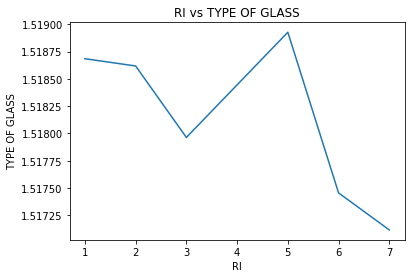

,TYPE OF GLASS,RI
TYPE OF GLASS,1.000000,-0.161322
RI,-0.161322,1.000000


In [62]:
#data['transform'] = np.square (data['RI'])
#data.plot(x = 'RI', y='TYPE OF GLASS', style ='o' )
data.groupby('TYPE OF GLASS')['RI'].mean().plot()
plt.title('RI vs TYPE OF GLASS')
plt.xlabel('RI')
plt.ylabel('TYPE OF GLASS')
plt.show()
data[['TYPE OF GLASS','RI']].corr()

<AxesSubplot:>

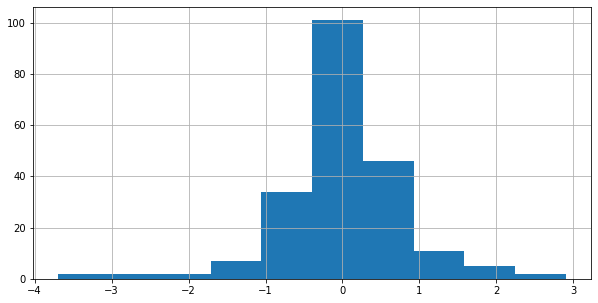

In [63]:
plt.figure(figsize=(10,5))

data["NA"].diff().hist()

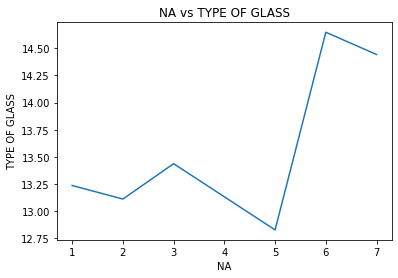

,TYPE OF GLASS,NA
TYPE OF GLASS,1.000000,0.504983
NA,0.504983,1.000000


In [64]:
#data['transform'] = (data['NA'])
#data.plot(x = 'NA', y='TYPE OF GLASS', style ='o' )
data.groupby('TYPE OF GLASS')['NA'].mean().plot()
plt.title('NA vs TYPE OF GLASS')
plt.xlabel('NA')
plt.ylabel('TYPE OF GLASS')
plt.show()
data[['TYPE OF GLASS','NA']].corr()

<AxesSubplot:>

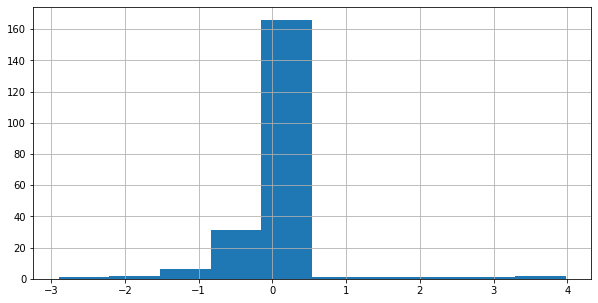

In [65]:
plt.figure(figsize=(10,5))

data["MG"].diff().hist()

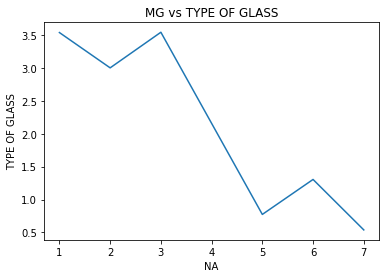

,TYPE OF GLASS,MG
TYPE OF GLASS,1.000000,-0.744004
MG,-0.744004,1.000000


In [66]:
#data['transform'] = (data['MG'])
#data.plot(x = 'MG', y='TYPE OF GLASS', style ='o' )
data.groupby('TYPE OF GLASS')['MG'].mean().plot()
plt.title('MG vs TYPE OF GLASS')
plt.xlabel('NA')
plt.ylabel('TYPE OF GLASS')
plt.show()
data[['TYPE OF GLASS','MG']].corr()

<AxesSubplot:>

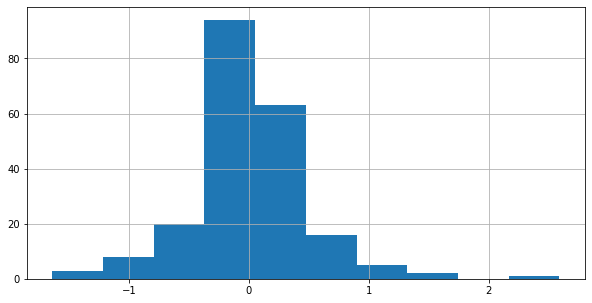

In [67]:
plt.figure(figsize=(10,5))

data["AL"].diff().hist()

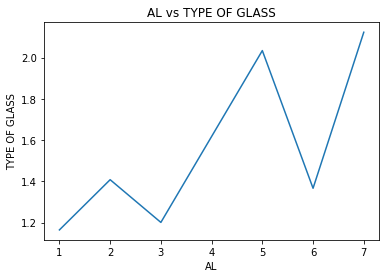

,AL,TYPE OF GLASS
AL,1.000000,0.597754
TYPE OF GLASS,0.597754,1.000000


In [68]:
#data['transform'] = np.square (data['AL'])
#data.plot(x = 'RI', y='TYPE OF GLASS', style ='o' )
data.groupby('TYPE OF GLASS')['AL'].mean().plot()
plt.title('AL vs TYPE OF GLASS')
plt.xlabel('AL')
plt.ylabel('TYPE OF GLASS')
plt.show()
data[['AL','TYPE OF GLASS']].corr()

<AxesSubplot:>

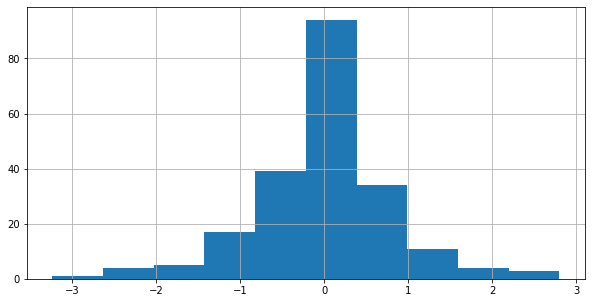

In [69]:
plt.figure(figsize=(10,5))

data["SI"].diff().hist()

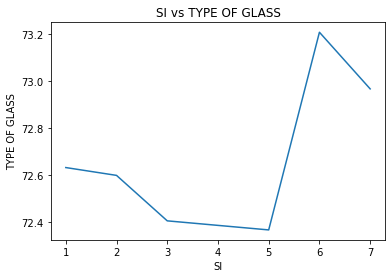

,TYPE OF GLASS,SI
TYPE OF GLASS,1.000000,0.147767
SI,0.147767,1.000000


In [70]:
#data['transform'] = np.square (data['SI'])
#data.plot(x = 'RI', y='TYPE OF GLASS', style ='o' )
data.groupby('TYPE OF GLASS')['SI'].mean().plot()
plt.title('SI vs TYPE OF GLASS')
plt.xlabel('SI')
plt.ylabel('TYPE OF GLASS')
plt.show()
data[['TYPE OF GLASS','SI']].corr()

<AxesSubplot:>

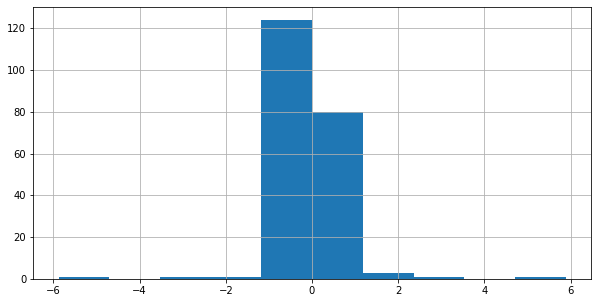

In [71]:
plt.figure(figsize=(10,5))

data["K"].diff().hist()

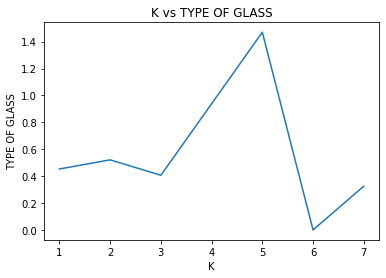

,TYPE OF GLASS,K
TYPE OF GLASS,1.000000,-0.012765
K,-0.012765,1.000000


In [72]:
#data['transform'] = np.square (data['SI'])
#data.plot(x = 'RI', y='TYPE OF GLASS', style ='o' )
data.groupby('TYPE OF GLASS')['K'].mean().plot()
plt.title('K vs TYPE OF GLASS')
plt.xlabel('K')
plt.ylabel('TYPE OF GLASS')
plt.show()
data[['TYPE OF GLASS','K']].corr()

<AxesSubplot:>

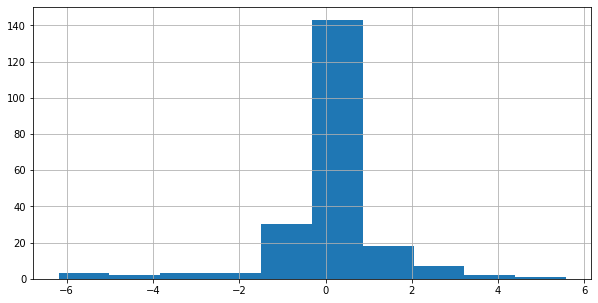

In [73]:
plt.figure(figsize=(10,5))

data["CA"].diff().hist()

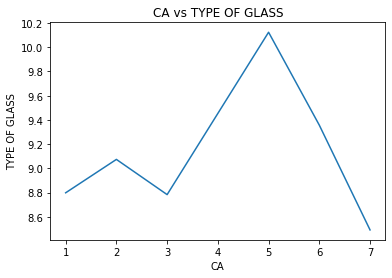

,CA,TYPE OF GLASS
CA,1.000000,0.000372
TYPE OF GLASS,0.000372,1.000000


In [74]:
#data['transform'] = np.log(data['CA'])
#data.plot(x = 'RI', y='TYPE OF GLASS', style ='o' )
data.groupby('TYPE OF GLASS')['CA'].mean().plot()
plt.title('CA vs TYPE OF GLASS')
plt.xlabel('CA')
plt.ylabel('TYPE OF GLASS')
plt.show()
data[['CA','TYPE OF GLASS']].corr()

<AxesSubplot:>

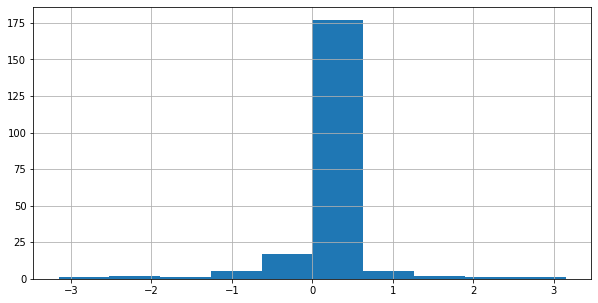

In [75]:
plt.figure(figsize=(10,5))

data["BA"].diff().hist()

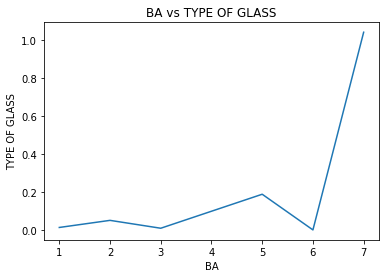

,BA,TYPE OF GLASS
BA,1.000000,0.574896
TYPE OF GLASS,0.574896,1.000000


In [76]:
#data['transform'] = np.log(data['CA'])
#data.plot(x = 'RI', y='TYPE OF GLASS', style ='o' )
data.groupby('TYPE OF GLASS')['BA'].mean().plot()
plt.title('BA vs TYPE OF GLASS')
plt.xlabel('BA')
plt.ylabel('TYPE OF GLASS')
plt.show()
data[['BA','TYPE OF GLASS']].corr()

<AxesSubplot:>

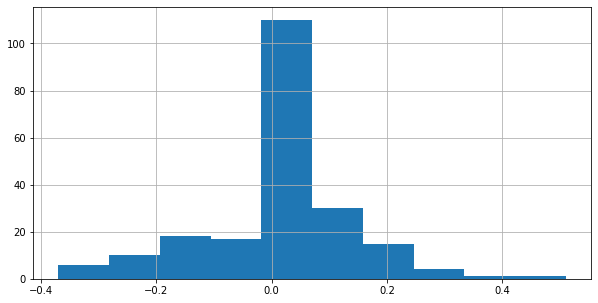

In [77]:
plt.figure(figsize=(10,5))

data["FE"].diff().hist()

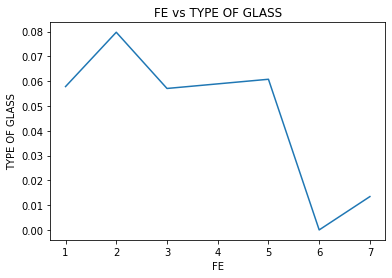

,FE,TYPE OF GLASS
FE,1.00000,-0.19109
TYPE OF GLASS,-0.19109,1.00000


In [78]:
#data['transform'] = np.log(data['CA'])
#data.plot(x = 'RI', y='TYPE OF GLASS', style ='o' )
data.groupby('TYPE OF GLASS')['FE'].mean().plot()
plt.title('FE vs TYPE OF GLASS')
plt.xlabel('FE')
plt.ylabel('TYPE OF GLASS')
plt.show()
data[['FE','TYPE OF GLASS']].corr()

In [79]:
data['TYPE OF GLASS'].value_counts(normalize = True)

2    0.356808
1    0.323944
7    0.136150
3    0.079812
5    0.061033
6    0.042254
Name: TYPE OF GLASS, dtype: float64

In [80]:
import seaborn as sns

<AxesSubplot:xlabel='TYPE OF GLASS', ylabel='count'>

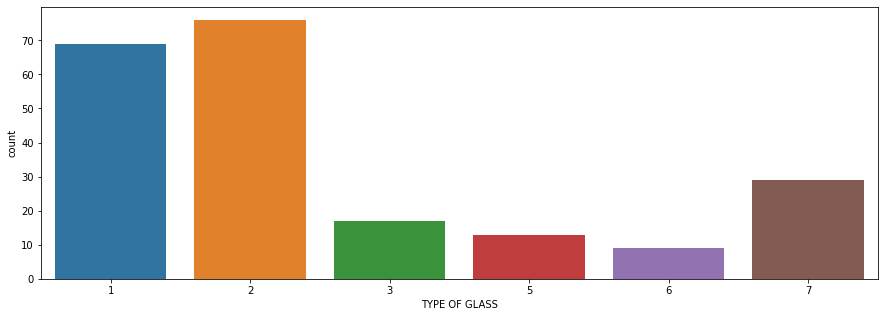

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['TYPE OF GLASS'])

In [82]:
data.head()

,RI,NA,MG,AL,SI,K,CA,BA,FE,TYPE OF GLASS
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [83]:
'''from sklearn.model_selection import train_test_split

x = data.drop(['TYPE OF GLASS'],axis=1)

y = data['TYPE OF GLASS']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=7)'''


In [92]:
from sklearn.model_selection import train_test_split

x = data.drop(['TYPE OF GLASS','MG','K','CA','FE'],axis=1)

y = data['TYPE OF GLASS']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=7)

In [93]:
x_train

,RI,NA,AL,SI,BA
165,1.52151,11.03,1.56,73.44,0.00
131,1.51813,13.43,1.18,72.49,0.00
32,1.51753,12.57,1.38,73.39,0.00
13,1.51763,12.61,1.31,73.29,0.00
129,1.52177,13.75,1.36,72.19,0.00
...,...,...,...,...,...
151,1.51779,13.64,0.65,73.00,0.00
67,1.52152,13.12,0.90,72.20,0.00
25,1.51793,13.21,1.41,72.64,0.00
196,1.51727,14.70,2.34,73.28,0.66


In [94]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Manhattan**

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2,metric='manhattan')

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

y_pred

array([2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 7, 3, 2, 2, 2, 2, 2,
       2, 7, 2, 2, 7, 1, 2, 2, 7, 5, 1, 1, 1, 7, 1, 1, 2, 1, 2, 7, 2, 1,
       2, 7, 1, 1, 1, 1, 1, 1, 1, 1])

In [96]:
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report


print('Accuracy :',accuracy_score(y_test,y_pred))

print('classification_report :',classification_report(y_test,y_pred))

Accuracy : 0.7407407407407407
classification_report :               precision    recall  f1-score   support

           1       0.65      0.94      0.77        16
           2       0.82      0.75      0.78        24
           3       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.86      1.00      0.92         6

    accuracy                           0.74        54
   macro avg       0.55      0.50      0.50        54
weighted avg       0.71      0.74      0.71        54



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Square Euclidean**

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2,metric='sqeuclidean')

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

y_pred

array([2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 7, 3, 2, 2, 2, 2, 2,
       2, 7, 2, 6, 7, 1, 2, 1, 7, 5, 1, 1, 1, 7, 2, 1, 2, 1, 2, 7, 2, 1,
       2, 7, 1, 1, 1, 1, 1, 1, 1, 1])

In [98]:
from sklearn.metrics import accuracy_score,classification_report

print('Accuracy :',accuracy_score(y_test,y_pred))

print('classification_report :',classification_report(y_test,y_pred))

Accuracy : 0.7592592592592593
classification_report :               precision    recall  f1-score   support

           1       0.65      0.94      0.77        16
           2       0.86      0.75      0.80        24
           3       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00         1
           7       0.86      1.00      0.92         6

    accuracy                           0.76        54
   macro avg       0.73      0.67      0.67        54
weighted avg       0.74      0.76      0.73        54



# If we take all feature we get acuuracy of manhattan is 0.722 and Square Euclidean is 0.74


#IF take top 3 features from data [NA,AI,BA] we get accuracy score is more then the all features
#Manhattan is giving 0.74
# Square Euclidean is giving 0.759